![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

## Modelling the COVID19 Outbreak in Canada

In this notebook, we’ll implement a “<b>S</b>usceptible, <b>E</b>xposed, <b>I</b>nfected and <b>R</b>ecovered” (<b>SEIR</b>) model used in epidemiology, the study of how disease occurs in populations. 

### How to use this notebook:

![](./images/runb.png)

Click on the cell below. Press the <b>>|Run</b> button on the to run the cell below. <b>Note the code cells will <font color=red>not</font> work unless the cell below is run upon opening the notebook</b>.


In [ ]:
%run ./scripts/covid19_model.py

### <font color=red>Teacher notes: What is a Mathematical Model

<font color=red> A mathematical model is a description of a system using <b>mathematical concepts</b> and <b>mathematical language</b>.

You can think of a math model as a tool to help us describe what we believe about the workings of phenomena in the world. 

<b>We use the language of mathematics to express our beliefs.</b>

<b>We use mathematics (theoretical and numerical analysis) to evaluate the model, and get insights about the original phenomenon.</b></font>

### <font color=red> Teacher notes: How do we model a problem using mathematics?</font>

<font color=red> You can use the table below to help with outlining steps followed in mathematical modelling. </font>

|Step | Description |
|-|-|
|1| <font color=#000000><b>Choose what phenomenon you want to model|</b></font>
|2| <font color=#000000><b>What assumptions are you making about the phenomenon|1|</b></font>   
|3| <font color=#000000><b>Use a flow diagram to help you determine the structure of your model|1|</b></font>
|4| <font color=#000000><b>Choose equations|2|</b></font>
|5| <font color=#000000><b>Implement equations using Python|2|</b></font>
|6| <font color=#000000><b>Solve equations|2|</b></font>
|7| <font color=#000000><b>Study the behaviour of the model|3|</b></font>
|8| <font color=#000000><b>Test the model|3|</b></font>
|9| <font color=#000000><b>Use the model|3|</b></font>
    
    

### Our phenomenon of interest: modelling number of people affected by COVID-19

Let's turn now to an event that made headlines in 2020: the COVID-19 pandemic. 

COVID-19 is a viral infection caused by a pathogen called SARS-CoV-2. 

<center><img src='./images/23311_lores.jpg',style="width: 600px;"></center>

<center>SARS-CoV-2 virus. Illustration by CDC/ Alissa Eckert, MSMI; Dan Higgins, MAMS (2020) </center>

### <font color=red>Teacher notes: Using mathematics to model the COVID-19 outbreak </font>

<font color=red>You can discuss with your class the students' understanding of the COVID-19 outbreak. This is an opportunity to brainstorm collective understanding of the disease, how it affects people, and what assumptions can be made. 
    
The students can then watch the video below to see an example of making assumptions around the COVID-19 outbreak.</font>
    
Run the cell below to display a YouTube video. Play the YouTube Video to learn more about how we can use mathematics to model the COVID-19 outbreak.

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('b_pTxGu2L04')

### <font color=red> Teacher notes: Assumptions for a first model </font>

<font color=red> The students are asked to explain the assumptions discussed in the video. 

Some of those assumptions are summarized here: 
1. Mode of transmission of the disease from person to person is through contact ("contact transmission") between a person who interacts with an infectious person. 
    
2. Once a person comes into contact with the pathogen, there is a period of time (called the latency period) in which they are infected, but cannot infect others (yet!). 

3. Population is not-constant (that is, people are born and die as time goes by).

4. A person in the population is either one of:
    - <b>S</b>usceptible, i.e. not infected but not yet exposed, 
    - <b>E</b>xposed to the infection, i.e. exposed to the virus, but not yet infectious, 
    - <b>I</b>nfectious, and 
    - <b>R</b>ecovered from the infection. 
    
5. People can die by "natural causes" during any of the stages. We assume an additional cause of death associated with the infectious stage. 

6. People can get reinfected after they recover.</font>


<font color=red> You can then discuss with the students whether they these assumptions are correct and incorrect, and why. 

### Flow diagram representing those assumptions

How does a person move from one stage into another? In other words, how does a person go from susceptible to exposed, to infected, to recovered? 

$\Delta$: Per-capita birth rate.

$\mu$: Per-capita natural death rate.

$\alpha$: Virus-induced average fatality rate.

$\beta$: Probability of disease transmission per contact (dimensionless) times the number of contacts per unit time.

$\epsilon$: Rate of progression from exposed to infectious (the reciprocal is the incubation period).

$\gamma$: Recovery rate of infectious individuals (the reciprocal is the infectious period).

$\delta$: Rate at which a recovered person re-enters into the susceptible category

<center><img src='./images/SEIR.png',style="width: 600px;"></center>


### <font color=red> Teacher notes: Discussing the flow diagram </font>
    
<font color=red> If the students decided the assumptions were wrong, how would this change the diagram? </font>
    

### Using Mathematics & Code to Create a Simulation

Using a tool from Calculus called "Differential Equations", we can create a system that will allow us to study our model. 

It will look daunting - but don't fret! This is what we refer to as using the language of mathematics to express our beliefs about a phenomenon. 

Watch this YouTube Video to see how we get to the equations using our assumptions and the diagram. 



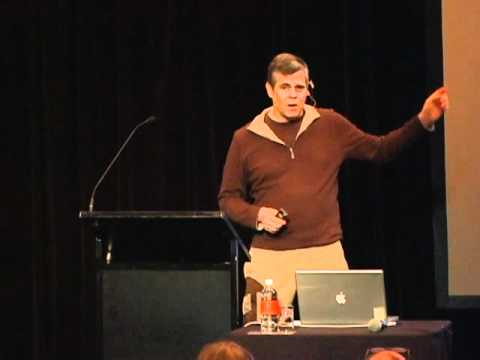

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('b_pTxGu2L04')

### <font color=red> Teacher notes: The mathematical model </font>

<font color=red> These are the equations associated to the speaker's assumptions and flow diagram. 
    
<b> NOTE: there is no need to go in to too much detail if not necessary. The system of equations is provided as a reference in case you as a teacher would like to discuss them.</b>
    

$N$ is updated at each time step, and infected peopel die at a higher rate. 

$$ N = S + E + I + R$$

We can then express our model using differential equations

$$\frac{dS}{dt} = \Delta N - \beta \frac{S}{N}I - \mu S + \delta R$$

$$\frac{dE}{dt} = \beta \frac{S}{N}I - \mu E - \epsilon E$$

$$\frac{dI}{dt} = \epsilon E - (\gamma+ \mu + \alpha )I$$

$$\frac{dR}{dt} = \gamma I - \mu R -  \delta R$$

Also, we can keep track of people who die due to the infection. 

$$\frac{dD}{dt} = \alpha I $$

We can then solve the equations to see how the values for Susceptible (S), Exposed (E), Infectious (I) and Recovered (R) change over time. 

### <font color=red> Teacher notes: Tinkering with the Parameters: $\beta$, the rate of contact</font>

<font color=red> After discussing the assumptions and the diagram, the students are invited to explore the relationship between the different rates and how the number of Susceptible, Exposed, Infectious, Recovered and Deaths change. </font>

### Tinkering with the Parameters: $\beta$, the rate of contact

We can use Python code to solve for and plot the solutions to our system of equations.

Let's start with the rate of contact $\beta$. The more susceptible people are in contact with infectious people, the higher the value of $\beta$. 

What happens when we reduce this rate?, i.e. if we find ways to reduce contact between infectious and susceptible people? 

Run the cells below, and use the widget to find out how the numbers change. 

In [ ]:
%run ./scripts/covid19_model.py

In [ ]:
interact_manual(tinker_beta, 
         beta=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5,description='Beta: contact rate',style=style));

When we reduce the contact between infectious and susceptible, we see that the number of new infections each infection generates is lower. 

How can we reduce the contact in real life? 

We can do things like social distancing, wearing masks, and using vaccines to prevent susceptible people from becoming exposed. 

What is the rate $\beta$ required so that each infections generates less than 1 infection?

What happens in our plot when we enter that value for $\beta$?

<font color=red> Teacher note: when we reduce the rate of contact beta, we should see a decline in the number of new infectious people. 

### Tinkering with the Parameters $\beta$: the rate of contact and $\alpha$: the rate of death due COVID-19


How deadly is COVID-19? Let's tinker with a new parameter $\alpha$ - in our diagram, this corresponds to the death by COVID-19 rate. 



In [ ]:
interact_manual(tinker_beta_alpha, 
    beta=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5,description='Beta: contact rate',style=style),
    alpha=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5,description='Alpha: COVID-19 death rate',style=style));

Something interesting will happen now...the deadlier the virus is, the lower the number of new infections generated by each existing infection. 

In the table found [here](https://coronavirus.jhu.edu/data/mortality) under "Case-fatality" there are percentages for the case fatality of COVID-19 for different countries. 

If you want to try them using our notebook, recall that 1% can be represented by decimal values as 0.01, 10% as 0.1 and 100% as 1.0. 

Do you think that COVID-19 is a deadly disease?

<font color=red> Teacher note: When we increase the rate of death due covid, we should see a dramatic increase in the number of deaths, as well as a sharp decline in the number of infectious people. This is an opportunity to discuss the MERS outbreak https://www.medicalnewstoday.com/articles/how-do-sars-and-mers-compare-with-covid-19#Coronaviruses-past-and-present </font>

### <font color=red> Teacher notes: Tinkering with the remaining parameters </font>


<font color=red> In this section we can incorporate the remaining rates into the simulation, and study how changing the rates changes the number of people in each of the four categories.  </font>

### Tinkering with the remaining parameters  
Let's incorporate the rest of our parameters into the simulation. 

$\Delta$: Per-capita birth rate.

$\mu$: Per-capita natural death rate.

$\alpha$: Virus-induced average fatality rate.

$\beta$: Probability of disease transmission per contact (dimensionless) times the number of contacts per unit time.

$\epsilon$: Rate of progression from exposed to infectious (the reciprocal is the incubation period).

$\gamma$: Recovery rate of infectious individuals (the reciprocal is the infectious period).

$\delta$: Rate at which a recovered person re-enters into the susceptible category

<center><img src='./images/FlowChart.png',style="width: 600px;"></center>


Run the cell below and change the values of parameters to see how the numbers change. 

In [ ]:
display(tab)

### <font color=red> Plotting number of infectious against reported cases of COVID-19 in Canada </font>

<font color=red> In this section you can then discuss with the students how we can use the model and compare it against data on confirmed cases. 

Discuss the difference between infectious and confirmed. When does someone get tested. How much time goes by between they show symptoms and getting tested, and why are people who are confirmed as having COVID-19 are asked to self-isolate. </font>

### Plotting number of infectious against reported cases of COVID-19 in Canada

Using COVID-19 Open Data [1], we are going to compare our model to the number of daily cases reported in Canada. 

[1] COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University, https://github.com/CSSEGISandData/COVID-19

In Canada, a person normally gets tested once they start displaying [symptoms of COVID-19](https://www.covid-19canada.com/#symptoms).

By the time a person starts showing symptoms, they can infect others who are in close contact with them. 

Let's focus on the number of infectious people then and plot that against real data. 

Run the following cell. 

Play with the parameters to get a "first guess" of what the parameters in our model are. Try to get as close as possible to the curve of reported data.

In [ ]:
%run -i ./scripts/open_data.py

In [ ]:
display(tab1)

### <font color=red> Teacher notes: Models' limitations <font>
    
<font color=red> Discuss with the students the limitations of the model as well as the data. Some of them are listed below:

1. Our assumes a constant contact rate - whereas we have modified our contact rate by practicing social distancing, lockdown, and easing lockdown measures. 

2. Our model assumes immunity post recovery - which is yet to be proven or disproven. 

3. Our model does not take into account inner circles having higher probability of exposure and infection when a member is infectious. 

4. Our model does not take into account other factors, such as age, immunodeficiencies, and groups who might be more impacted than others. 

5. Model is extremely sensitive to perturbations - small changes in parameters lead to significant changes in number of people in Exposed and Infected categories. 

### Data's Limitations:

1. Infected individuals are those who got tested and obtained a positive result - it does not take into account actual cases that were never reported. 

2. Infected individuals present symptoms - difficult to measure asymptomatic transmission.

3. Data does not represent accurately whether report is from the same individual at different times. 

4. Data is based on test accuracy - a false negative means there might be infected people who tested negative, similar to a false positive, i.e. people who are not infected who test as if they were. 


## Further reading 

Infectious Disease Modelling https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4

Model adapted from Carcione José M., Santos Juan E., Bagaini Claudio, Ba Jing, A Simulation of a COVID-19 Epidemic Based on a Deterministic SEIR Model. <b>Frontiers in Public Health</b> Vol 8, 2020 https://www.frontiersin.org/article/10.3389/fpubh.2020.00230   DOI=10.3389/fpubh.2020.00230   

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)